<a href="https://colab.research.google.com/github/jakob-morales/machine-learning-from-scratch/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Ignore warnings
warnings.filterwarnings("ignore")

In [10]:
#Load the iris dataset
iris = datasets.load_iris(as_frame = True)

#Separate feature and target variables
X = iris.data
y = iris.target

#Complete DataFrane
df = iris.data

#Change dummy variable to species name
df['Species'] = iris.target.map(dict(zip([0,1,2],iris.target_names)))

#Drop target variable
X = X.drop('Species', axis=1)

#Split the data into a training set and a test set. A test_size of 0.4 was optimal.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [11]:
def mink_distance (array1, array2, p=2):
  """Computes the Minkowski distance, which allows the user to input 1 for Manhattan distance or 2 for Euclidean distance."""

  distance = sum(abs(ii-i)**p for i, ii in zip(array1, array2))**(1/p)
  return distance

In [12]:
def KNN (X_train, X_test, y_train, k, manhat_euclid = 2, regression = False):
  """
  K-Nearest Neighbors Classifier

  """
  #Empty list to store predictions
  y_hat = []

  #Get distances between test and training dataset points
  for i in X_test.to_numpy():
    distances = []
    for ii in range(len(X_train)):
      distances.append(
          mink_distance(np.array(X_train.iloc[ii]), i, manhat_euclid)
          )
      
    #Put distances into a DataFrame and take kvsmallest values 
    distance_df = pd.DataFrame(distances,columns=['distance'])
    nsmallest = distance_df.nsmallest(k, 'distance').index
    
    #Use classification or regression
    if regression == True:
      vote = y_train.iloc[nsmallest].mean()
    else:
      vote = y_train.iloc[nsmallest].mode()[0]
    
    #Append votes to prediction list
    y_hat.append(vote)
  return y_hat

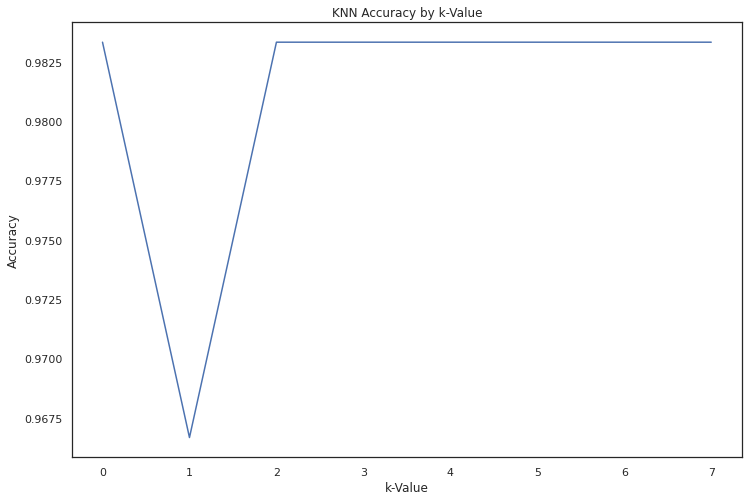

In [13]:
#Hyperparameter tuning of k to optimize accuracy
scores = []
for i in range(3,11):
  preds = KNN(X_train, X_test, y_train,k=i, manhat_euclid=2)
  scores.append(np.mean(y_test == preds))


plt.plot(scores)
plt.xlabel('k-Value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy by k-Value')
plt.show()

In [14]:
#Train KNN and print score
preds = KNN(X_train, X_test, y_train,k=11)

print('My KNN score: ' + str(np.mean(y_test == preds)))

#Compare to out-of-the-box sklearn classifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print('Sklearn KNN score: ' + str(knn.score(X_test,y_test)))

My KNN score: 0.9833333333333333
Sklearn KNN score: 0.9833333333333333


Text(0.5, 1.01, 'Pairplots of Training Data and Test Set Prediction Accuracy')

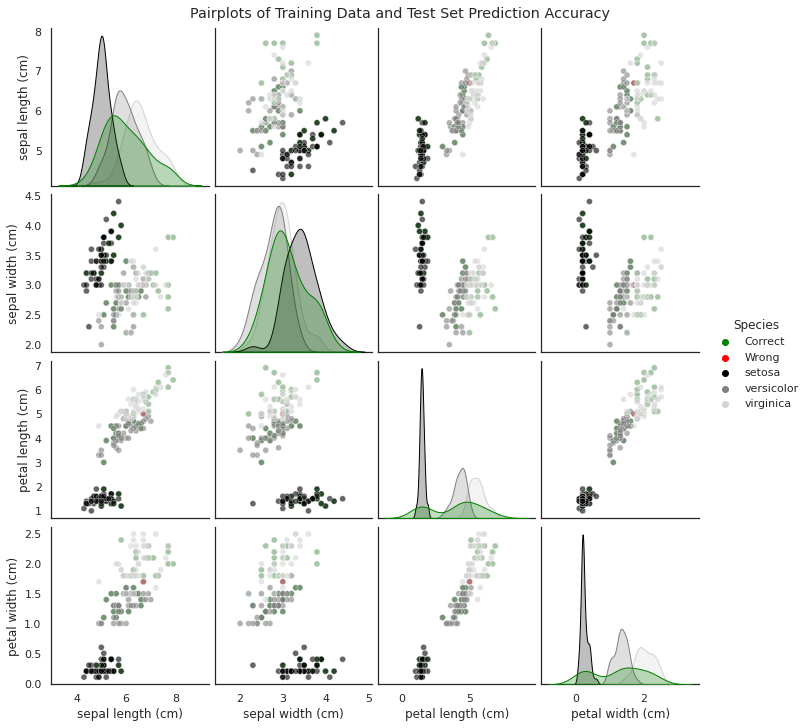

In [15]:
### Examine correct and incorrect values in relation to training data

#Mark test data as correct or wrong, and add to training data
errors = X_test.loc[y_test == preds]
errors['Species'] = 'Correct'
temp = X_test.loc[y_test != preds]
temp['Species'] = 'Wrong'
errors = pd.concat([errors, temp])

errors = pd.concat([errors, df]).reset_index(drop=True)

#Create pairplot to exame what was correct or wrong, would be more meaningful on a less accurate model
ax = sns.pairplot(
             errors, 
             hue = 'Species', 
             palette = {'Correct':'green', 
                        'Wrong':'red',
                        'setosa':'black', 
                        'virginica':'lightgray', 
                        'versicolor':'gray'},
             plot_kws={'alpha':0.6})
ax.fig.suptitle('Pairplots of Training Data and Test Set Prediction Accuracy', y=1.01)